<h2 style="color:green" align="center">Machine Learning With Python: Linear Regression With One Variable</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart.

You can draw multiple lines like this but we choose the one where total sum of error is minimum

You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

Generic form of same equation is,

In [ ]:
# Importing necessary libraries
import pandas as pd                      # For data loading and manipulation
import numpy as np                       # For numerical operations like mean
from sklearn import linear_model         # For using Linear Regression model
import matplotlib.pyplot as plt          # For plotting graphs
from statistics import mean              # To calculate average

In [ ]:
#df = pd.read_csv(csv, dtype={'rating': 'Int64'})
#df = pd.read_csv('/content/sample_data/homeprices.csv', dtype={'bedrooms': 'Int64'} )
df = pd.read_csv('/content/sample_data/homeprices.csv' )
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


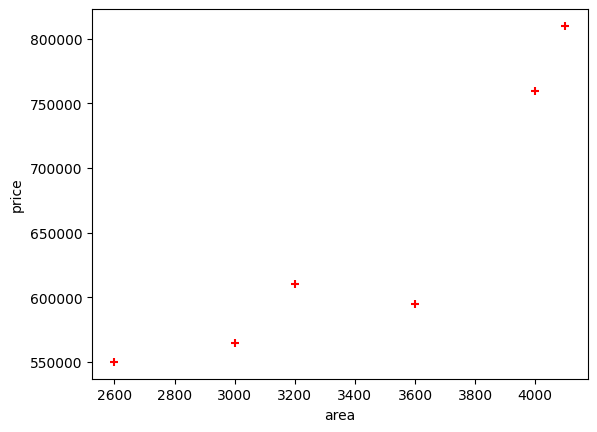

In [ ]:
# Plotting a scatter graph to visualize the relation between 'area' and 'price'
%matplotlib inline
plt.xlabel('area')                      # Label for x-axis
plt.ylabel('price')                     # Label for y-axis
plt.scatter(df.area, df.price, color='red', marker='+')  # Plot with red '+' markers

In [ ]:
# Separate the features (independent variables) from the target (dependent variable)
# 'price' is what we want to predict, so we drop it from features
new_df = df.drop('price', axis='columns')  # 'axis=1' would also work

# Store the target variable (price) in a separate variable
price = df.price
price

,price
0,550000
1,565000
2,610000
3,595000
4,760000
5,810000


In [ ]:
#new_df['bedrooms'].fillna(value=mean, inplace=True)

# Filling any missing values in the feature dataset using column-wise mean
# This ensures that the model doesn't fail due to NaN values
new_df = new_df.fillna(new_df.mean())  # numeric_only is used

#new_df['bedrooms'].fillna(value= new_df['bedrooms'].mean()[0] , inplace=True)
#new_df['bedrooms'] = new_df['bedrooms'].fillna(new_df['bedrooms'].mode()[0])
#new_df['bedrooms'] = new_df['bedrooms'].astype('int')
#new_df['bedrooms'] = new_df['bedrooms'].apply(np.ceil)
#df['Column1'] = df['Column1'].astype(int)
#new_df.astype('int32').dtypes

In [ ]:
reg = linear_model.LinearRegression() # Create a linear regression model

# Train the model using features and target
reg.fit(new_df, price)  # .fit for training the model

LinearRegression()

**(1) Predict price of a home with area = 3300 sqr ft**

Given Area = 3300, Bedrooms = 5, Age = 10

In [ ]:
# Input must match the structure of training data: [area, bedrooms, age]

reg.predict([[3300, 5, 10]]) #.predict to use your model -> output the price

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([673619.30374121])

In [ ]:
# Display learned coefficients (slopes for each feature)

reg.coef_ #coef_ to know the weights w used for each feature Area,Bedrooms, Age

array([  116.66950551, 18756.28806982, -3675.75111708])

In [ ]:
# Display the intercept (b value in y = mx + b)

reg.intercept_ #intercept to know the bias b used for each feature Area,Bedrooms, Age

np.float64(231586.00639409182)

**Y = m * X + b (m is coefficient and b is intercept)**

To get the Y/ the output of the model using above w and b and X feature values

In [ ]:
# price = 116.67*area + 18756.29*bedrooms - 3675.75*age + 231586.00

3300*135.78767123 + 180616.43835616432

628715.7534151643

**(2) Predict price of a home with area = 5000 sqr ft**

Area = 5000, Bedrooms = 5, Age = 20

In [ ]:
reg.predict([[5000,5,20]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([835199.9519301])

<h3 style="color:purple">Generate CSV file with list of home price predictions</h3>

In [ ]:
area_df = pd.read_csv("/content/areas.csv")
area_df.head(5)

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [ ]:
# Predict prices for all rows in the new dataset
p = reg.predict(area_df)
p

In [ ]:
# Add predicted prices as a new column in the DataFrame
area_df['prices'] = p
area_df

# area_df.to_csv("prediction.csv")

<h3>Exercise</h3>

# Predict Canada's Per Capita Income in 2020
https://github.com/codebasics/py/tree/master/ML/1_linear_reg


<p >Predict canada's per capita income in year 2020.
There is an exercise folder here on.

Build a regression model and predict the per capita income fo canadian citizens in year 2020</p>

In [ ]:
df = pd.read_csv('/content/sample_data/canada_per_capita_income.csv')
df.head(5)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


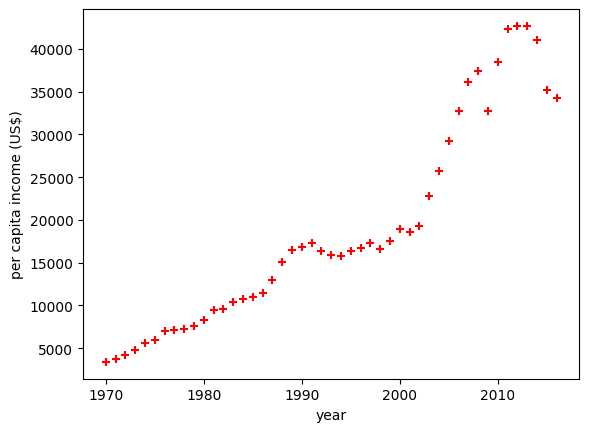

In [ ]:
# Visualize the data
plt.xlabel('year')                          # x-axis label
plt.ylabel('per capita income (US$)')             # y-axis label

plt.scatter(df['year'], df['per capita income (US$)'], color='red', marker='+')

In [ ]:
# Train a linear regression model using year to predict income

reg = linear_model.LinearRegression()
reg.fit(df[['year']], df['per capita income (US$)'])

LinearRegression()

In [ ]:
# income per person per capita income in 2020
reg.predict([[2020]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])